# The Materials API

In this lesson, we cover:

* The (new) Materials Project API (MAPI) and its documentation (https://api.materialsproject.org/).
* Getting your Materials Project API key.
* Using the MPRester to access the MP database.
* A hands-on example of using the API and pymatgen to screen the MP database for interesting materials.

In [1]:
# This supresses warnings.
import warnings
warnings.filterwarnings('ignore')

# This is a helper function to shorten lists during the 
# live presentation of this lesson for better readability. 
# You can ignore it. 
def shortlist(long_list, n=5):
    print("First {} of {} items:".format(min(n, 5), len(long_list)))
    for item in long_list[0:n]:
        print(item)

***
## Section 0: Installing the Materials Project API client

The new API client can be installed using pip: `pip install mp-api`

***NOTE: If you are doing this lesson in CoCalc, the package should already be installed.***

***
## Section 1: Getting an API key

The first step to getting started with the API is to get an API key. This can be done on the next-gen preview Materials Project website (https://next-gen.materialsproject.org.)

1. Log in using your account of choice.
2. Click `API` in the top right of the homepage.
3. Copy and paste your API key in the command below.

In [2]:
!export MP_API_KEY="<your API key>"

## Section 2: Documentation

A description of the new Materials Project API can be found on the [API details page](https://next-gen.materialsproject.org/api). This, along with the [more detailed documentation](https://api.materialsproject.org/docs) it links to, are a key source of information regarding what data can be queried for. It should be the first thing you consult whenever you are having trouble with the API. Let's take a look!

***
## Section 3: Direct Queries

To request data from the Materials Project, you will need to make requests to our API. To do this, you could simply make a GET HTTP request providing your API key as an argument in the header of the request. 

Below is an example of this using the `requests` package in python.

In [3]:
import requests

response = requests.get("https://api.materialsproject.org/materials/mp-149/?all_fields=true", 
                        headers={"X-API-KEY": "<your API key>"})

print(response.text)

{
  "message":"Invalid authentication credentials"
}



The above request for the material id and structure of Si (mp-149) returns the following JSON document:
```
{"data":[{"_id":"60b7d8ddb671aa7b01a7ce04","material_id":"mp-149","structure":{"@module":"pymatgen.core.structure","@class":"Structure","charge":null,"lattice":{"matrix":[[5.468728,0.0,3.348630120303753e-16],[8.794385361720812e-16,5.468728,3.348630120303753e-16],[0.0,0.0,5.468728]],"a":5.468728,"b":5.468728,"c":5.468728,"alpha":90.0,"beta":90.0,"gamma":90.0,"volume":163.55317139465933},"sites":[{"species":[{"element":"Si","occu":1}],"abc":[0.25,0.75,0.25],"xyz":[1.3671820000000006,4.101546,1.3671820000000003],"label":"Si","properties":{}},{"species":[{"element":"Si","occu":1}],"abc":[0.0,0.0,0.5],"xyz":[0.0,0.0,2.734364],"label":"Si","properties":{}},{"species":[{"element":"Si","occu":1}],"abc":[0.25,0.25,0.75],"xyz":[1.3671820000000001,1.367182,4.101546],"label":"Si","properties":{}},{"species":[{"element":"Si","occu":1}],"abc":[0.0,0.5,0.0],"xyz":[4.397192680860406e-16,2.734364,1.6743150601518765e-16],"label":"Si","properties":{}},{"species":[{"element":"Si","occu":1}],"abc":[0.75,0.75,0.75],"xyz":[4.101546000000001,4.101546,4.101546000000001],"label":"Si","properties":{}},{"species":[{"element":"Si","occu":1}],"abc":[0.5,0.0,0.0],"xyz":[2.734364,0.0,1.6743150601518765e-16],"label":"Si","properties":{}},{"species":[{"element":"Si","occu":1}],"abc":[0.75,0.25,0.25],"xyz":[4.101546,1.367182,1.3671820000000003],"label":"Si","properties":{}},{"species":[{"element":"Si","occu":1}],"abc":[0.5,0.5,0.5],"xyz":[2.7343640000000002,2.734364,2.7343640000000002],"label":"Si","properties":{}}]}}]}
```

***
## Section 3: The MPRester

In this section we will:

* Open the API documentation.
* Create our first instance of an MPRester object.
* Get our feet wet with calling a few of the MPRester's "specialty" methods.



#### Background and Documentation

* Code connects to the MP Database through REST requests.
* Pymatgen's MPRester class is helpful for accessing our API in python.

#### Background and Documentation

REST is a widely used type of standardization that allows different computer systems to work together. In RESTful systems, information is organized into resources, each of which is uniquely identified via a uniform resource identifier (URI). Since the Materials Project API is a RESTful system, users can interact with the MP database regardless of their computer system or programming language (as long as it supports basic http requests.)

To facilitate researchers in using our API, we implemented a convenient wrapper for it called the `MPRester`.

### Starting up an instance of the MPRester

We'll import the MPRester and create an instance of it. 

*Note: You may need to use your API key as an input argument if it has not been pre-configured.*

In [15]:
from mp_api.matproj import MPRester

mpr = MPRester()
mpr.materials.available_fields

['structure',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'material_id',
 'deprecated',
 'initial_structures',
 'task_ids',
 'deprecated_tasks',
 'calc_types',
 'last_updated',
 'created_at',
 'origins',
 'warnings']

However, we recommend that you use the “with” context manager to ensure that sessions are properly closed after usage:

In [26]:
with MPRester() as mpr:
    print(mpr.thermo.available_fields)

['structure', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'material_id', 'last_updated', 'origins', 'warnings', 'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_uncertainy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'energy_type', 'entry_types', 'entries']


### MPRester Methods:

The MPRester has many methods that you might want to use in your research. For example, there is a method to get the bandstructure for a material, `get_bandstructure_by_material_id`. 

Let's use this method and the following bandstructure plotting function to get and plot a bandstructure for mp-1234:

In [17]:
### Don't edit this code ####
from pymatgen.electronic_structure.plotter import BSPlotter
# Helpful function for plotting a bandstructure. 
def plot_bandstructure(bs):
    BSPlotter(bs).get_plot().show() 
#############################

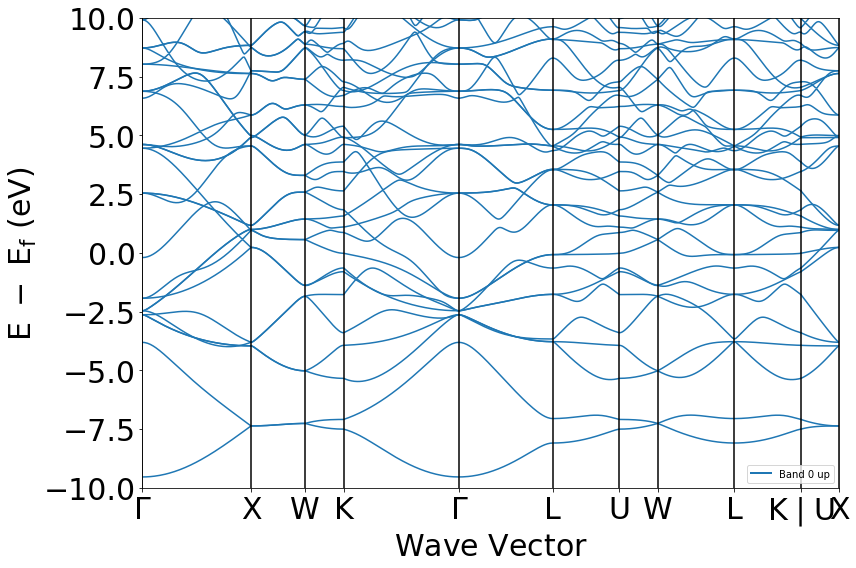

In [18]:
# Excercise: Use the MPRester's get_bandstructure_by_material_id method to 
# get a bandstructure from the MP Database and plot it using the
# plot_bandstructure functin defined above.
with MPRester() as mpr:
    bs = mpr.get_bandstructure_by_material_id("mp-1234")

plot_bandstructure(bs) 

There's also a method to get MPIDs for a formula or chemical system called `get_materials_ids`.

In [19]:
with MPRester() as mpr:
    # You can pass in a formula to get_materials_ids
    shortlist(mpr.get_materials_ids("LiFePO4"))
    # Or you can pass in a "chemsys" such as "Li-Fe-P-O"
    shortlist(mpr.get_materials_ids("Li-Fe-P-O"))

First 5 of 70 items:
mp-18951
mp-19017
mp-26041
mp-26559
mp-26611
First 5 of 388 items:
mp-6373
mp-18951
mp-19017
mp-19294
mp-19430


### Using the API to achieve research goals: 

Imagine you want to get the **structure** for the ferroelectric material $Ca_3Ti_2O_7$ (**`mp-4163`**) and suggest some **substrates** for growing it.

We can use methods of the MPRester to get this information from the Materials Project API. 

Hints:

* `MPRester.get_structure_by_material_id`
* `MPRester.get_substrates` 

In [25]:
# Get the structure for Ca3Ti2O7 (mp-4163) and 
# suggest some substrates for growing it.
with MPRester() as mpr:
    structure = mpr.get_structure_by_material_id("mp-4163")
    substrates = mpr.get_substrates("mp-4163")
    print(structure)
    print([s["sub_form"] for s in substrates])

Full Formula (Ca12 Ti8 O28)
Reduced Formula: Ca3Ti2O7
abc   :   5.463042  19.475586   5.537287
angles:  90.000000  90.000000  90.000000
Sites (48)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Ca    0.253586  0         0.038816
  1  Ca    0.746414  0         0.538816
  2  Ca    0.241473  0.687655  0.455977
  3  Ca    0.258527  0.812345  0.955977
  4  Ca    0.741473  0.812345  0.455977
  5  Ca    0.758527  0.687655  0.955977
  6  Ca    0.753586  0.5       0.038816
  7  Ca    0.246414  0.5       0.538816
  8  Ca    0.741473  0.187655  0.455977
  9  Ca    0.758527  0.312345  0.955977
 10  Ca    0.241473  0.312345  0.455977
 11  Ca    0.258527  0.187655  0.955977
 12  Ti    0.751218  0.600015  0.488523
 13  Ti    0.748782  0.899985  0.988523
 14  Ti    0.248782  0.600015  0.988523
 15  Ti    0.251218  0.899985  0.488523
 16  Ti    0.251218  0.100015  0.488523
 17  Ti    0.248782  0.399985  0.988523
 18  Ti    0.748782  0.100015  0.988523
 19  Ti    0.

At this point, you should be comfortable with:

* Finding documentation on the MPRester. 
* Creating an instance of the MPRester.
* Using methods of the MPRester.

***
## Section 4: Using the MPRester.query method.

The MPRester has a very powerful method called `query`, which allows us to search over aggregate data for a material in our database. You will probably find yourself using the MPRester's query method frequently...


The method returns a list of `SummaryDoc` objects which contain the data for the material as attributes.

Let's try out some queries to learn how it works! 

First, we'll query for $SiO_2$ compounds in a variety of ways using through `chemsys_formula`.

In [ ]:
# Here we query with the explicit formula
with MPRester() as mpr:
    results = mpr.query(chemsys_formula="SiO2")
    print(len(results))

In [ ]:
# Here we query with the chemical system (chemsys)
with MPRester() as mpr:
    results = mpr.query(chemsys_formula="Si-O")
    print(len(results))

If we investigate the object that the query method returns, we find that it is a list of dicts. Furthermore, we find that the keys of the dictionaries are the very same keywords that we passed to the query method as the `properties` argument.

In [ ]:
print('Results are returned as a {} of {}.\n'.format(type(results), type(results[0])))

for r in results[0:5]:
    print(r)

You can even use **wildcard** characters in `chemsys_formula` searches. For example, if we want to find all $ABO_3$ compounds in the Materials Project:

In [ ]:
with MPRester() as mpr:
    results = mpr.query(chemsys_formula='**O3', properties=["material_id", "pretty_formula"])
    shortlist(results)

***
## Section 5: Accessing more detailed properties

The `query` method lets us search through *some* aggregate data but not all.

TO query all available data of a particular category, specific search methods can be used.

For example, let's query for initial structures for all cubic materials with 2 or less atomic sites using the materials specific search method:

In [36]:
with MPRester() as mpr:
    results = mpr.materials.search_material_docs(crystal_system="Cubic", 
                                                nsites=(0,2), 
                                                all_fields=False, 
                                                fields=["material_id", "initial_structures"])

In [38]:
print('Results are returned as a {} of {}.\n'.format(type(results), type(results[0])))

for r in results[0:1]:
    print(r)

Results are returned as a <class 'list'> of <class 'emmet.core.material.MaterialsDoc'>.

structure=None nsites=None elements=None nelements=None composition=None composition_reduced=None formula_pretty=None formula_anonymous=None chemsys=None volume=None density=None density_atomic=None symmetry=None material_id=MPID(mp-1239193) deprecated=True initial_structures=[Structure Summary
Lattice
    abc : 6.037829 3.018914 3.018914
 angles : 90.0 90.0 90.0
 volume : 55.027817955535625
      A : 6.037829 0.0 0.0
      B : 0.0 3.018914 0.0
      C : 0.0 0.0 3.018914
PeriodicSite: Rh (1.5095, 1.5095, 1.5095) [0.2500, 0.5000, 0.5000]
PeriodicSite: Rh (4.5284, 1.5095, 1.5095) [0.7500, 0.5000, 0.5000], Structure Summary
Lattice
    abc : 5.086717 2.548028 2.548028
 angles : 90.0 90.0 90.0
 volume : 33.02523894343128
      A : 5.086717 0.0 0.0
      B : 0.0 2.548028 0.0
      C : 0.0 0.0 2.548028
PeriodicSite: Rh (1.2717, 1.2740, 1.2740) [0.2500, 0.5000, 0.5000]
PeriodicSite: Rh (3.8150, 1.2740, 1.

Much like the `SummaryDoc` we can access data of `MaterialsDoc` through it's attributes, or by conversion to a python dictionary.

In [40]:
results[0].material_id, results[0].initial_structures

(MPID(mp-1239193),
 [Structure Summary
  Lattice
      abc : 6.037829 3.018914 3.018914
   angles : 90.0 90.0 90.0
   volume : 55.027817955535625
        A : 6.037829 0.0 0.0
        B : 0.0 3.018914 0.0
        C : 0.0 0.0 3.018914
  PeriodicSite: Rh (1.5095, 1.5095, 1.5095) [0.2500, 0.5000, 0.5000]
  PeriodicSite: Rh (4.5284, 1.5095, 1.5095) [0.7500, 0.5000, 0.5000],
  Structure Summary
  Lattice
      abc : 5.086717 2.548028 2.548028
   angles : 90.0 90.0 90.0
   volume : 33.02523894343128
        A : 5.086717 0.0 0.0
        B : 0.0 2.548028 0.0
        C : 0.0 0.0 2.548028
  PeriodicSite: Rh (1.2717, 1.2740, 1.2740) [0.2500, 0.5000, 0.5000]
  PeriodicSite: Rh (3.8150, 1.2740, 1.2740) [0.7500, 0.5000, 0.5000]])

In [41]:
results[0].dict()

{'structure': None,
 'nsites': None,
 'elements': None,
 'nelements': None,
 'composition': None,
 'composition_reduced': None,
 'formula_pretty': None,
 'formula_anonymous': None,
 'chemsys': None,
 'volume': None,
 'density': None,
 'density_atomic': None,
 'symmetry': None,
 'material_id': MPID(mp-1239193),
 'deprecated': True,
 'initial_structures': [Structure Summary
  Lattice
      abc : 6.037829 3.018914 3.018914
   angles : 90.0 90.0 90.0
   volume : 55.027817955535625
        A : 6.037829 0.0 0.0
        B : 0.0 3.018914 0.0
        C : 0.0 0.0 3.018914
  PeriodicSite: Rh (1.5095, 1.5095, 1.5095) [0.2500, 0.5000, 0.5000]
  PeriodicSite: Rh (4.5284, 1.5095, 1.5095) [0.7500, 0.5000, 0.5000],
  Structure Summary
  Lattice
      abc : 5.086717 2.548028 2.548028
   angles : 90.0 90.0 90.0
   volume : 33.02523894343128
        A : 5.086717 0.0 0.0
        B : 0.0 2.548028 0.0
        C : 0.0 0.0 2.548028
  PeriodicSite: Rh (1.2717, 1.2740, 1.2740) [0.2500, 0.5000, 0.5000]
  Periodic

***
# EXCERCISE 1

## MongoDB Operators

Above, we specified the chemical formula SiO$_2$ for our query. This is an example of, the "specify" operator. However, MongoDB's syntax also includes other [query operators](https://docs.mongodb.com/manual/reference/operator/query/#query-selectors), allowing us to bulid complex conditionals into our queries. These all start with the "$" character.


Some important MongoDB operators you should be familiar with are: 

- \$in (in)
- \$nin (not in)
- \$gt (greater than)
- \$gte (greater than or equal to)
- \$lt (less than) 
- \$lte (less than or equal to)
- \$not (is not)
    
We used these more advanced operators as follows:

`{"field_name": {"$op": value}}`

For example, "entries with e_above_hull that is less than 0.25 eV" would be:

`{"e_above_hull": {"$lt": 0.25}}`



A paper by McEnany et. al. proposes a novel ammonia synthesis process based on the electrochemical cycling of lithium ([link](http://pubs.rsc.org/en/content/articlelanding/2017/ee/c7ee01126a#!divAbstract)). As an exercise, let's use some of MongoDB's operators and ask the database for nitrides of alkali metals.

In [ ]:
# Find all nitrides of alkali metals
alkali_metals = ['Li', 'Na', 'K', 'Rb', 'Cs']
criteria={"elements":{"$in":alkali_metals, "$all": ["N"]}, "nelements":2}
properties=['material_id', 'pretty_formula']
shortlist(mpr.query(criteria, properties))

In [ ]:
#Bonus short way to do this with wildcards
shortlist(mpr.query('{Li,Na,K,Rb,Cs}-N', ['material_id', 'pretty_formula']))

We can also perform the same query, but ask the database to only return compounds with energies above the hull less than 10 meV/atom by using the "less than" operator, "`$lt`". (The energy above the convex hull gives us a sense of how stable a compound is relative to other compounds with the same composition.) 

In [ ]:
criteria={"elements":{"$in":alkali_metals, "$all":["N"]}, "nelements":2, 
          'e_above_hull':{"$lt":0.010}}
properties=['material_id', 'pretty_formula']
mpr.query(criteria, properties)

# EXCERCISE 2

In this lesson, we have covered:

* The Materials Project API (MAPI) and its documentation, the [mapidoc](https://github.com/materialsproject/mapidoc).
* Getting your Materials Project API key.
* Using the MPRester to access the MP database.
* Hands-on examples of using the API and pymatgen to screen the MP database for interesting materials.